In [19]:
from math import pi, prod
from oscar import Landscape, QiskitExecutor, BPDNReconstructor, TenevaReconstructor
import numpy as np
import networkx as nx
from qiskit.algorithms.optimizers import COBYLA
from qiskit_aer.primitives import Sampler
from qiskit.algorithms.minimum_eigensolvers import QAOA
from qiskit.utils import algorithm_globals
from qiskit_optimization.applications import Maxcut
import matplotlib.pyplot as plt

In [20]:
n = 6
p = 2
seed = 42
beta_resolution, gamma_resolution = 10, 10
beta_bounds, gamma_bounds = (pi / 8 - 0.1, pi / 8 + 0.1), (-pi / 4 - 0.2, pi / 4 + 0.2)
sampling_fraction = 1 / 20

landscape = Landscape(
    [beta_resolution] * p + [gamma_resolution] * p, 
    [beta_bounds] * p + [gamma_bounds] * p
)

In [21]:
graph = nx.random_regular_graph(3, n, seed)
problem = Maxcut(graph).to_quadratic_program()
H, offset = problem.to_ising()

In [22]:
algorithm_globals.random_seed = seed
algorithm = QAOA(Sampler(run_options={"seed": seed, "shots": None}), COBYLA(), reps=p)

/tmp/ipykernel_11674/629005994.py:1: DeprecationWarning: The property ``qiskit.utils.algorithm_globals.QiskitAlgorithmGlobals.random_seed`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. This algorithm utility has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. You can run ``pip install qiskit_algorithms`` and import ``from qiskit_algorithms.utils`` instead. 
  algorithm_globals.random_seed = seed


In [23]:
# may take some time
import teneva

# indices = teneva.sample_lhs(
#     [beta_resolution] * p + [gamma_resolution] * p,
#     sampling_fraction * beta_resolution**p * gamma_resolution**p,
#     seed=42,
# )
# landscape.run_indices(QiskitExecutor(algorithm, H), indices.T)
_ = landscape.sample_and_run(QiskitExecutor(algorithm, H), sampling_fraction)

array([-9.41166435e-01,  1.05813649e+00,  1.90416141e+00,  1.07251500e+00,
        5.66180128e-01,  1.43035731e+00,  1.35979375e+00, -6.77345019e-01,
        7.25981837e-01, -9.84707317e-01, -1.12232456e+00,  7.37572757e-01,
        1.08133419e+00, -5.51526656e-01, -4.49074852e-01,  8.92347748e-02,
        1.58406342e+00,  1.55026703e-01,  1.04975127e+00, -5.01248695e-01,
        2.38444510e+00, -1.47495337e+00,  3.35522835e-01,  8.52492497e-01,
       -3.89991395e-01,  9.11582218e-02, -1.94224557e-01, -1.10983491e+00,
       -9.85640532e-01,  1.07414713e+00, -2.10145406e-02, -1.13608371e+00,
       -4.22719222e-01,  8.87224897e-01, -1.13017894e+00, -1.73216663e+00,
       -3.29010428e-02,  8.62353818e-01, -1.30315764e+00,  1.17244279e+00,
       -5.98504699e-01,  1.90207404e+00,  1.68407116e+00,  5.35311228e-01,
        6.58400646e-01, -1.91841197e+00,  1.44495877e-01, -8.47550265e-01,
        1.38396958e+00,  6.48229287e-02,  1.46085383e+00,  1.11624992e-01,
        1.54982756e+00, -

# pre | time:      0.000 | rank:  10.0 | 
#   1 | time:      0.088 | rank:  10.0 | e: 5.9e-01 | 
#   2 | time:      0.260 | rank:  10.0 | e: 1.1e-01 | 
#   3 | time:      0.317 | rank:  10.0 | e: 6.3e-02 | 
#   4 | time:      0.373 | rank:  10.0 | e: 4.4e-02 | 
#   5 | time:      0.438 | rank:  10.0 | e: 3.6e-02 | 
#   6 | time:      0.495 | rank:  10.0 | e: 2.9e-02 | 
#   7 | time:      0.549 | rank:  10.0 | e: 2.4e-02 | 
#   8 | time:      0.632 | rank:  10.0 | e: 2.0e-02 | 
#   9 | time:      0.694 | rank:  10.0 | e: 1.5e-02 | 
#  10 | time:      0.753 | rank:  10.0 | e: 1.3e-02 | 
#  11 | time:      0.809 | rank:  10.0 | e: 1.2e-02 | 
#  12 | time:      0.882 | rank:  10.0 | e: 1.1e-02 | 
#  13 | time:      0.949 | rank:  10.0 | e: 1.1e-02 | 
#  14 | time:      1.012 | rank:  10.0 | e: 1.0e-02 | 
#  15 | time:      1.077 | rank:  10.0 | e: 9.1e-03 | 
#  16 | time:      1.133 | rank:  10.0 | e: 8.3e-03 | 
#  17 | time:      1.195 | rank:  10.0 | e: 7.7e-03 | 
#  18 | time:      1.27

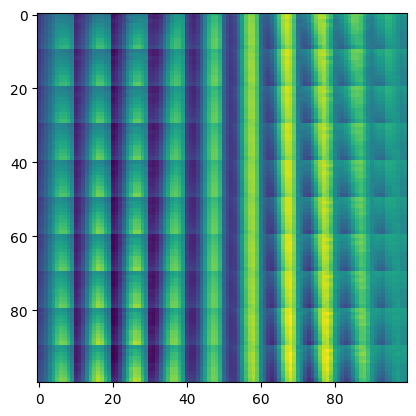

In [25]:
landscape.reconstruct(TenevaReconstructor({"r": 10, "order": 2}, {"lamb": 0.1, "log": True, "nswp": 100}))
# landscape.reconstruct(BPDNReconstructor())
plt.imshow(landscape.landscape.reshape(prod(landscape.shape[:p]), -1))

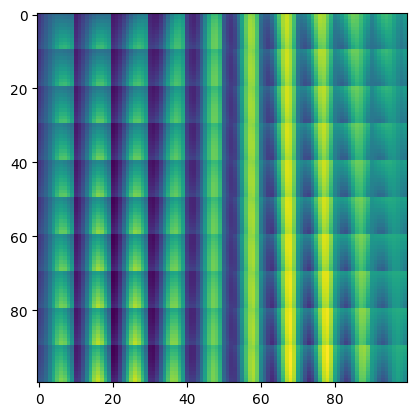

In [ ]:
# may take some time
exact_landscape = Landscape.like(landscape)
exact_landscape.run_all(QiskitExecutor(algorithm, H))
plt.imshow(exact_landscape.landscape.reshape(prod(landscape.shape[:p]), -1))